C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and 

<Axes: title={'center': 'Month Wise Box Plot(Seasonality)'}, xlabel='month', ylabel='value'>

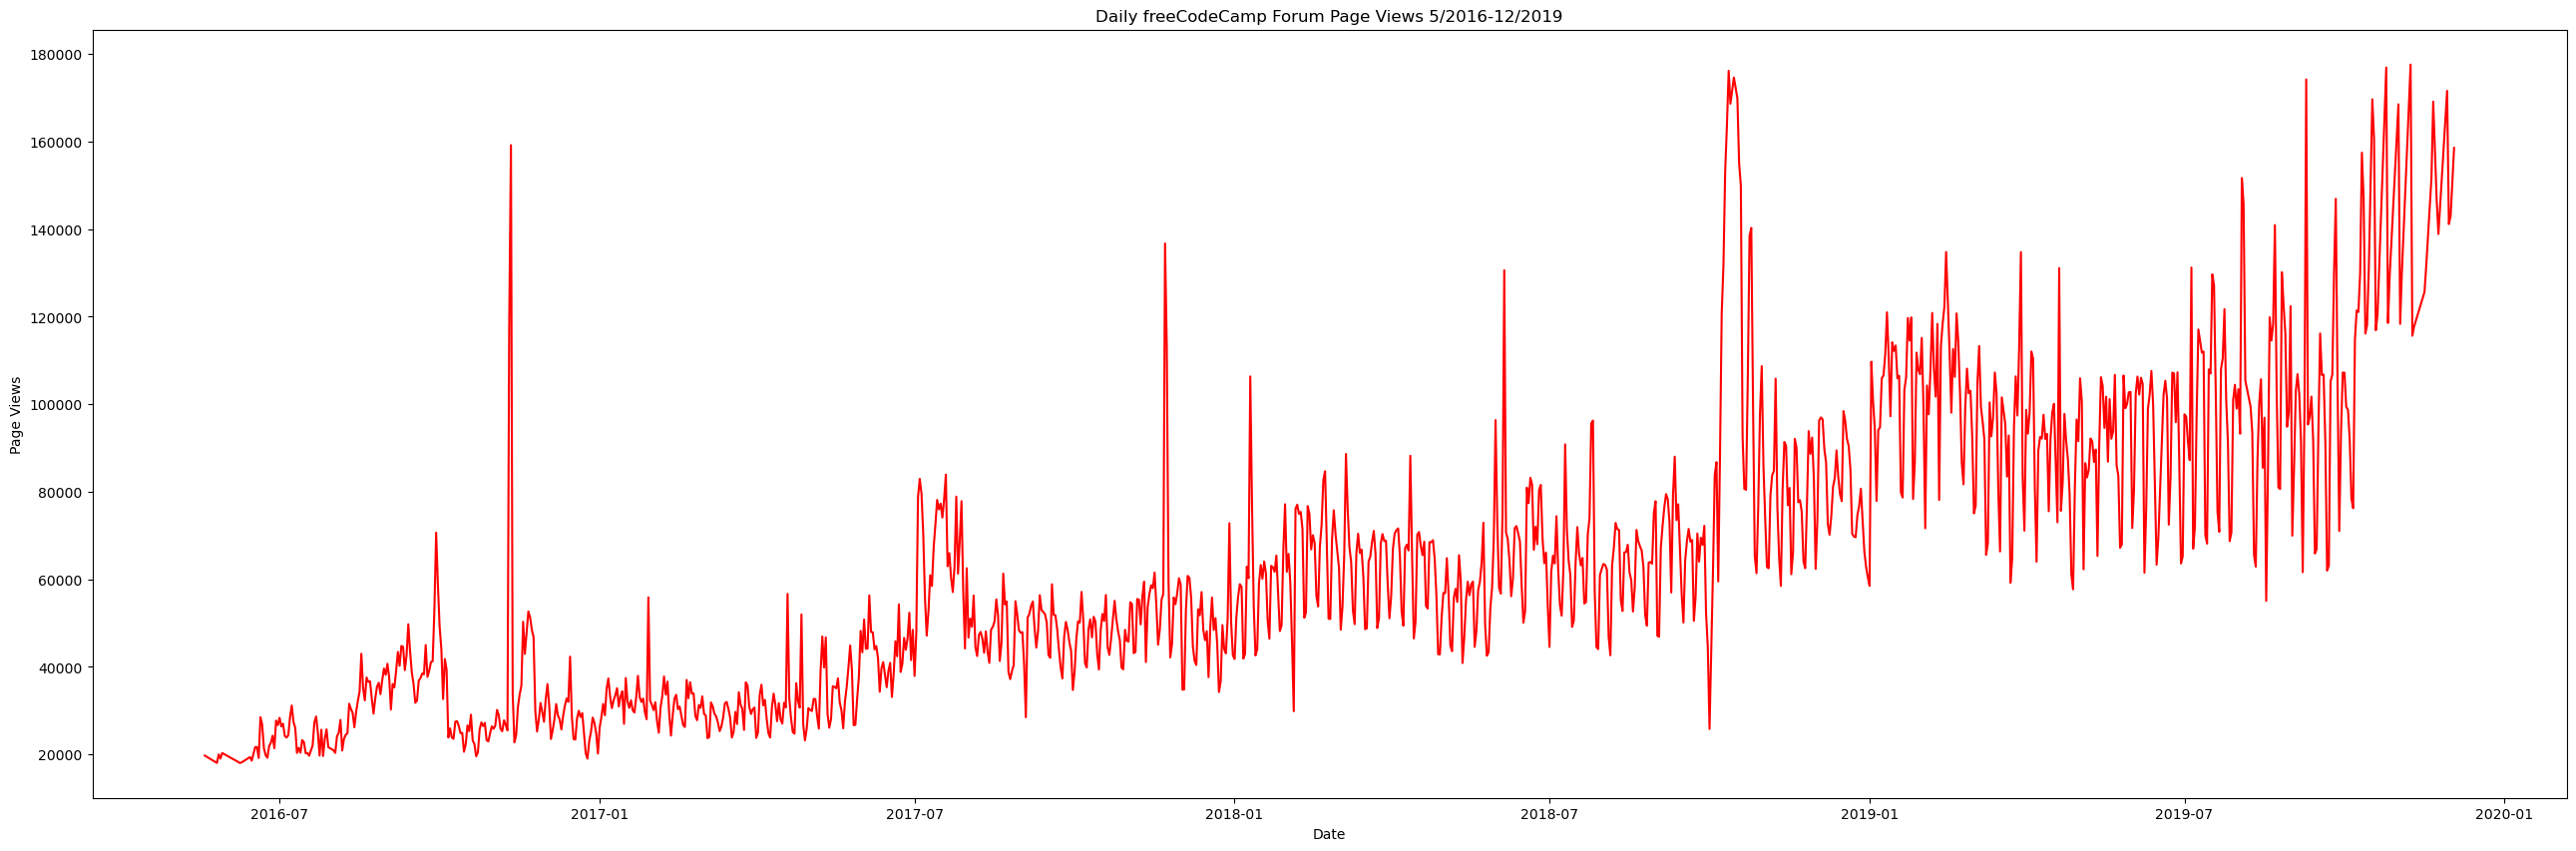

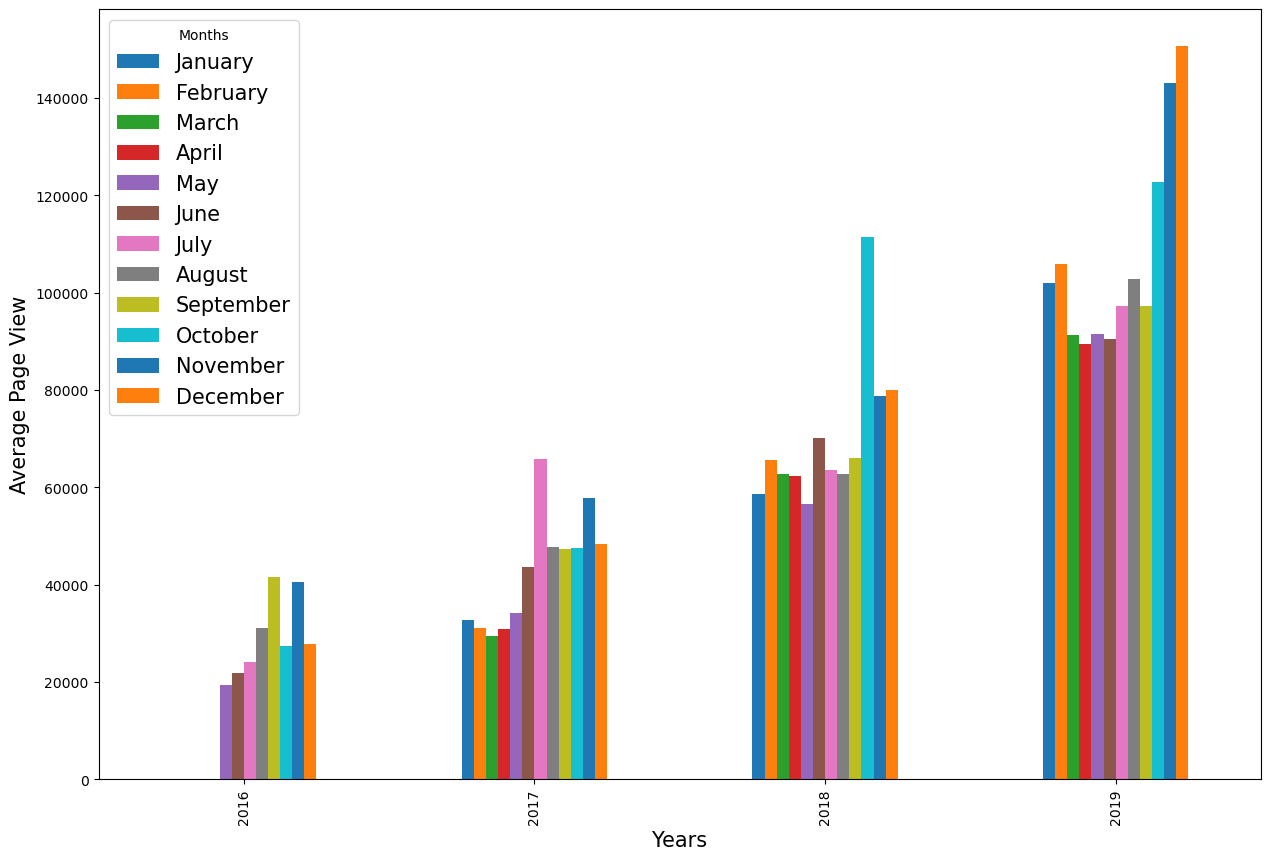

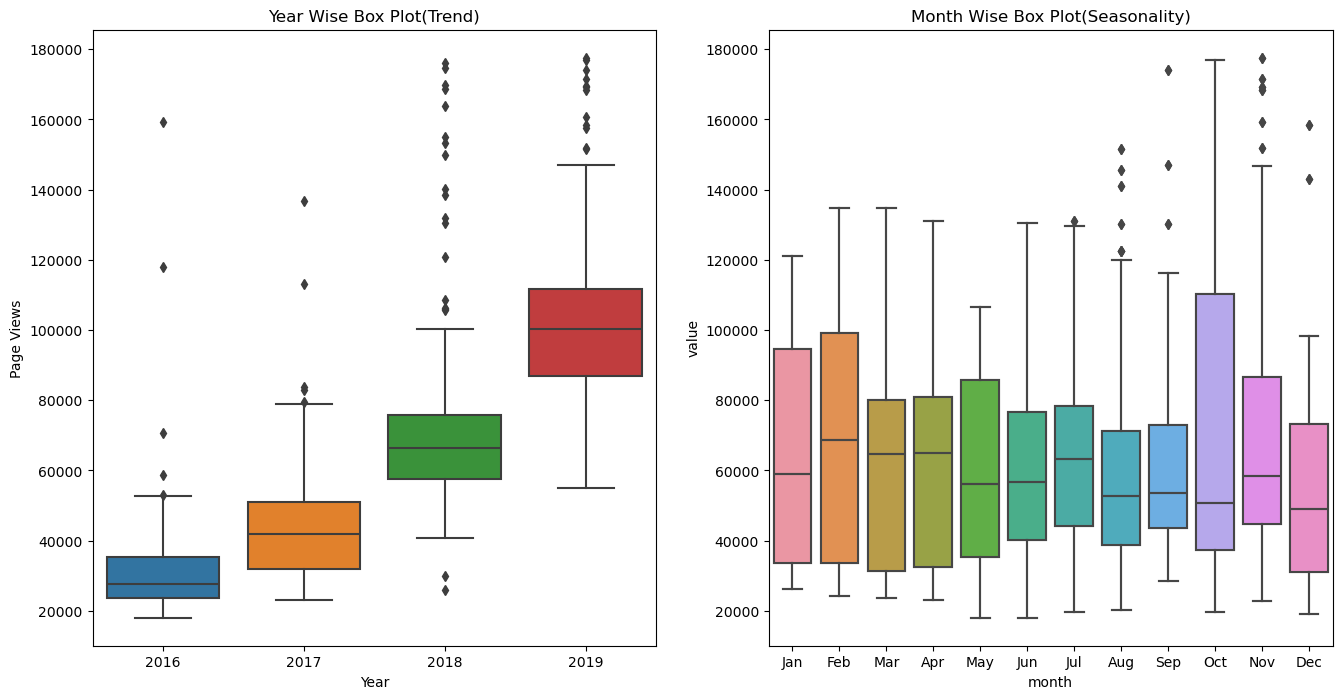

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = df= pd.read_csv(r"C:\Users\PC\OneDrive\Dokumente\tutorial pythonfiles\csv files\fcc-forum-pageviews.csv", index_col="date", parse_dates=True)

df = df.loc[(df['value']>=df['value'].quantile(0.025))&(df['value']<=df['value'].quantile(0.975))]


def draw_line_plot():
    fig,ax= plt.subplots(figsize=(32,10), dpi=100)
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    figure=sns.lineplot (data=df, legend=False, palette=['r'])
    fig=figure
    
    return fig

def draw_bar_plot():
    df_bar= df.copy()
    df_bar["year"]=df_bar.index.year
    df_bar["month"]= df_bar.index.month
    df_bar = df_bar.groupby(['year', 'month'])
    df_bar= df_bar.mean()
    df_bar=df_bar.unstack()
    df_bar.columns=['January','February','March','April','May','June','July','August','September','October','November','December']
    fig = df_bar.plot(kind='bar', figsize=(15,10)).figure
    plt.xlabel('Years',fontsize=15)
    plt.ylabel('Average Page View', fontsize=15)
    plt.legend(loc='upper left', title='Months', fontsize=15)
    
    return fig

def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    fig, (ax1,ax2)=plt.subplots(1,2, figsize=(16,8))
    sns.boxplot(data= df_box, ax=ax1, x='year', y='value')
    ax1.set_title("Year Wise Box Plot(Trend)")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Page Views")

    month_order=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    
    df_box['month'] = pd.Categorical(df_box['month'], categories=month_order, ordered=True)
    
    sns.boxplot(data= df_box, ax=ax2, x="month", y="value", order=month_order)
    ax2.set_title("Month Wise Box Plot(Seasonality)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")
    fig=sns.boxplot(data= df_box, ax=ax2, x="month", y="value")
    
    return fig
    
draw_line_plot()
draw_bar_plot()
draw_box_plot()